In this tutorial we'll investigate a systematic method to determine if a linear model is actually appropriate for our system, and how to transform the variables such that a linear model is in fact appropriate.

In [1]:
import pandas as pd
import os
data = pd.read_csv(os.getcwd() + os.sep + "T8Data.csv", delimiter=';')
print(data)

            x           y
0    1.000000    2.086033
1    1.090909    2.221410
2    1.181818    0.434298
3    1.272727    1.886390
4    1.363636    0.740685
..        ...         ...
95   9.636364   91.844718
96   9.727273   94.043264
97   9.818182   95.713047
98   9.909091   96.106594
99  10.000000  100.138001

[100 rows x 2 columns]


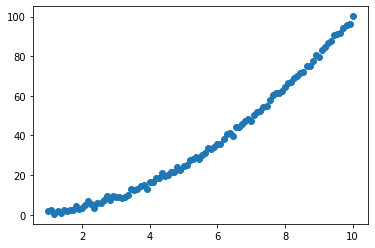

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'])

Based on our plot of the data, our equation might not be linear but we're not exactly sure, let's fit a linear model to the data and see. 

In [3]:
from statsmodels.formula.api import ols

model=ols("y~x", data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2116.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.73e-68
Time:                        20:26:43   Log-Likelihood:                -324.60
No. Observations:                 100   AIC:                             653.2
Df Residuals:                      98   BIC:                             658.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.4160      1.458    -16.060      0.0

The model overall seems decent. We know that y and x are correlated and we have a decent $R^2$ value. Let's investigate the model in more detail. Let's look at the model residuals. 

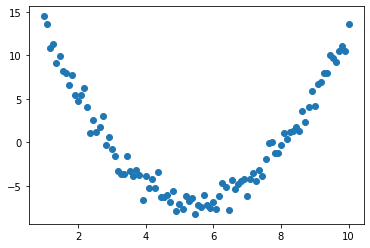

In [4]:
# Calculate the predictions based on our model
y_pred = -23.4 + 11*data['x']
error = data['y'] - y_pred
plt.scatter(data['x'], error)

Based on the above plot there's clear structure to our errors. Our errors values are clearly not normally distributed and definitely not constant at all levels of x. 

We think there is nonlinearity to our model. Let's now say our model takes the form: $y = x^p$. Based on the quadatic shape of our residuals, we sispect that p > 1. 

Let's test this systematically by stepping up p in units of 0.5 $\Rightarrow p = 1.5$

Linearize the model as follows and fit a linear model to the transformed data.
$y_{transformed} = y^{1/1.5} = x$


In [5]:
y_transformed = data['y']**(1/1.5)


In [6]:
model = ols("y~x", {'x': data['x'], 'y': y_transformed})
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.180e+04
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          5.98e-104
Time:                        20:26:43   Log-Likelihood:                -82.822
No. Observations:                 100   AIC:                             169.6
Df Residuals:                      98   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5291      0.130    -19.463      0.0

Our $R^2$ value improved but let's confirm the model structure is correct by looking at the errors again. When calculating the errors, make sure to transform y back to it's original units!

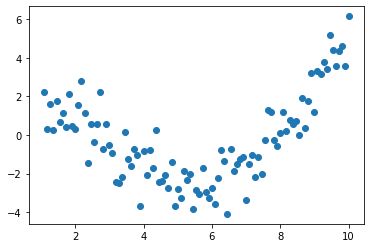

In [7]:
y_pred = -2.53 + 2.32*data['x']
y_original = y_pred**1.5
error = data['y'] - y_original
plt.scatter(data['x'], error)

There's less structure to our errors but they're still not constant at all levels of x. Let's step up p one more time $p=2$.

$y_{transformed} = y^{1/2} = x$

In [8]:
y_transformed = data['y']**(1/2)
model = ols("y~x", {'x': data['x'], 'y': y_transformed})
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.761e+04
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          6.17e-122
Time:                        20:26:43   Log-Likelihood:                 43.407
No. Observations:                 100   AIC:                            -82.81
Df Residuals:                      98   BIC:                            -77.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0222      0.037     -0.604      0.5

Let's validate this new model. 

Again, remember to transform y back to its original values. 

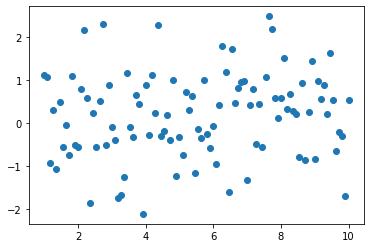

In [9]:
y_pred = -0.02 + 1.00*data['x']
y_new = y_pred**2
error = data['y'] - y_new
plt.scatter(data['x'], error)

Based on the above plot our error values look constant for all levels of x. There is no longer a clear structure to our errors. Based on this, we think that the transformation $y_{transformed} = y^{1/2} = x$ is reasonable. 

Note: in this tutorial we didn't think about how the transformation impacts the units of the coefficients. Make sure to pay attention to that when transforming real data. 